5. Исследовательское задание: малоранговая аппроксимация матрицы. Сгенерируйте случайную квадратную матрицу $A\in\mathbb{R}^{n\times{n}}, n>=100$.
С помощью функции numpy.linalg.svd выполните сингулярное разложение этой матрицы, и получите три матрицы: $U, S, V^
⊤$. Выполняйте аппроксимацию матрицы A с
рангом r, меняя его значение, например, от 2 до n:
$$\tilde{A} = U[:,:r]S[:r,:r]V^⊤[:r,:]$$
и каждый раз считайте ошибку апроксимации (как восстановленная матрица отличается от исходной):
$$E(r) = \begin{Vmatrix}A − \tilde{A}\end{Vmatrix}_{F} = \sqrt{\displaystyle\sum_{i=1}^{n}\displaystyle\sum_{j=1}^{n}(a_{ij} − \tilde{a}_{ij})^2}.$$
Используя библиотеку matplotlib, постройте график зависимости ошибки аппроксимации матрицы от
ранга r.

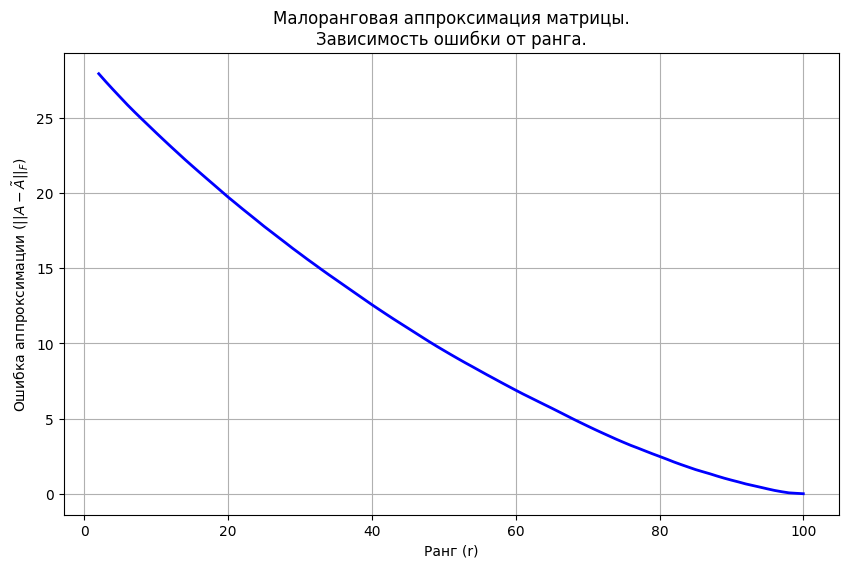

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Шаг 1: матрица n×n (n ≥ 100)
n = 100
A = np.random.rand(n, n)

# Шаг 2: Расчет SVD
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Шаг 3: Расчет ошибки аппроксимации для каждого ранга в даипазоне
errors = []
rank_range = range(2, n+1)

for r in rank_range:
    # формирование аппроксимации для ранга r
    S_r = np.diag(S[:r])
    U_r = U[:, :r]
    Vt_r = Vt[:r, :]
    A_r = U_r @ S_r @ Vt_r  # перемножение матриц
    
    # Расчет Нормы Фробениуса
    error = np.linalg.norm(A - A_r, 'fro')
    errors.append(error)

# Шаг 4: Построение графика
plt.figure(figsize=(10, 6))
plt.plot(rank_range, errors, 'b-', linewidth=2)
plt.title("Малоранговая аппроксимация матрицы.\nЗависимость ошибки от ранга.")
plt.xlabel("Ранг (r)")
plt.ylabel(r"Ошибка аппроксимации ($||A−\tilde{A}||_{F}$)")

plt.grid(True)
plt.show()